In [2]:
import numpy as np
from qiskit.algorithms.optimizers import CMAES, GradientDescent, TellObject, SPSA
import matplotlib.pyplot as plt
from pylab import figure, cm
from matplotlib.patches import Ellipse
np.random.seed(12)

In [10]:
def noise(y,std):
    noise = 1 + np.abs(np.random.normal(0,std,y.shape))
    return y * noise

def noisy_function_generator(std,fun):
    def fun_noisy(x):
        return noise(np.linalg.norm(x,axis=0),std)
    return fun_noisy

def parabola_function(x):
    return noise(np.linalg.norm(x,axis=0))

6.8394496938981195


In [37]:
N = 2
tol = 1e-8
initial_point = np.array([-5,-5])
sigma_0 = 6
print("x0=",initial_point,"|x0-1|",np.linalg.norm(initial_point-1)/np.sqrt(N), "\sigma:",sigma_0)

optimizer = CMAES(maxiter=15000 ,sigma_0 = sigma_0,)
nfev=[]
converged = []
x= np.linspace(0,1,1000)
for std in x:
    result = optimizer.minimize(x0=initial_point, fun=noisy_function_generator(std,parabola_function),)
    nfev.append(result.nfev)
    converged.append(result.fun < 0.01)

nfev = np.array(nfev)
converged = np.array(converged)

nfev_good = nfev[converged]
x_plot = x[converged]

print(1-converged.sum()/converged.size)


x0= [-5 -5] |x0-1| 5.999999999999999 \sigma: 6
0.07499999999999996


688.7884660208151 149.19035815007112


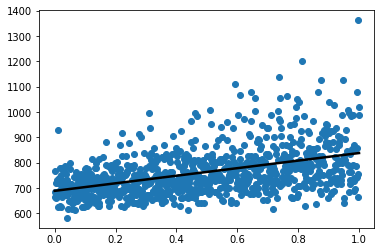

In [48]:
b, a = np.polyfit(x_plot, nfev_good, deg=1)

# Create sequence of 100 numbers from 0 to 100 
xseq = np.linspace(0, 1, num=100)

# Plot regression line
plt.scatter(x=x_plot,y=nfev_good)

plt.plot(xseq, a + b * xseq, color="k", lw=2.5);

print(a,b)

